In [1]:
import sqlite3
import random
import datetime

# Database setup
conn = sqlite3.connect('nairobi_properties.db')
cursor = conn.cursor()

# Create table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS properties (
        property_id INTEGER PRIMARY KEY,
        property_name TEXT,
        location TEXT,
        property_type TEXT,
        bedrooms INTEGER,
        bathrooms INTEGER,
        price REAL,
        square_meters INTEGER,
        listing_date TEXT,
        latitude REAL,
        longitude REAL
    )
''')

# Generate and insert data
locations = ['Kilimani', 'Westlands', 'Karen', 'Lavington', 'Upper Hill', 'Langata', 'Ngong Road', 'Gigiri', 'Muthaiga', 'South B']
property_types = ['Apartment', 'House', 'Condo', 'Townhouse', 'Bungalow']

for i in range(10000):  # Generate 10,000 records
    property_name = f"{random.choice(property_types)} in {random.choice(locations)} {i}"
    location = random.choice(locations)
    property_type = random.choice(property_types)
    bedrooms = random.randint(1, 5)
    bathrooms = random.randint(1, 3)
    price = round(random.uniform(5000000, 50000000), 2)  # Price in Kenyan Shillings
    square_meters = random.randint(50, 300)
    listing_date = (datetime.date.today() - datetime.timedelta(days=random.randint(0, 365))).strftime('%Y-%m-%d')
    latitude = round(random.uniform(-1.35, -1.20), 6) # Nairobi Latitudes
    longitude = round(random.uniform(36.70, 36.90), 6) # Nairobi Longitudes

    cursor.execute('''
        INSERT INTO properties (property_name, location, property_type, bedrooms, bathrooms, price, square_meters, listing_date, latitude, longitude)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (property_name, location, property_type, bedrooms, bathrooms, price, square_meters, listing_date, latitude, longitude))

conn.commit()
conn.close()

print("Dataset created successfully!")

Dataset created successfully!


In [2]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('nairobi_properties.db')
df = pd.read_sql_query("SELECT * FROM properties", conn)
conn.close()

print(df.head())
print(df.info())

   property_id            property_name    location property_type  bedrooms  \
0            1    Townhouse in Gigiri 0   Lavington      Bungalow         2   
1            2  Townhouse in Muthaiga 1      Gigiri         House         4   
2            3   Apartment in Langata 2  Upper Hill         House         3   
3            4   Townhouse in South B 3  Upper Hill         Condo         4   
4            5    Condo in Ngong Road 4    Kilimani         Condo         4   

   bathrooms        price  square_meters listing_date  latitude  longitude  
0          3  43906989.08            243   2024-05-22 -1.272784  36.856121  
1          3  33045061.01            210   2024-12-08 -1.223708  36.870435  
2          3  35208224.83            297   2024-04-30 -1.208104  36.796993  
3          3  17163522.62             86   2025-01-15 -1.249819  36.844296  
4          1  32703006.06            159   2025-03-21 -1.328535  36.820121  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries

In [3]:
# An example cleaning steps
df.dropna(inplace=True) # Drop missing values
df['listing_date'] = pd.to_datetime(df['listing_date']) # Convert to datetime
# Handle outliers (e.g., very high prices)
df = df[df['price'] < df['price'].quantile(0.95)]
# Feature engineering (e.g., price per square meter)
df['price_per_sqm'] = df['price'] / df['square_meters']

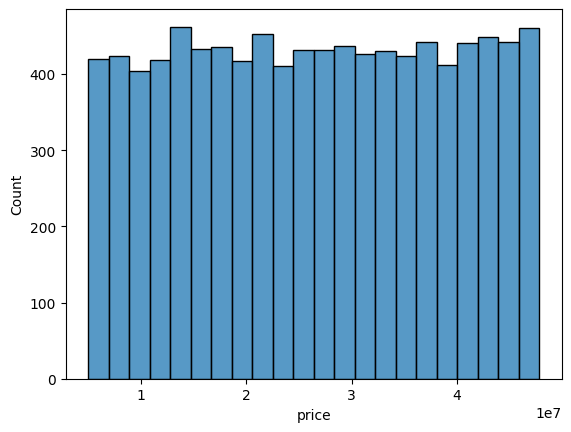

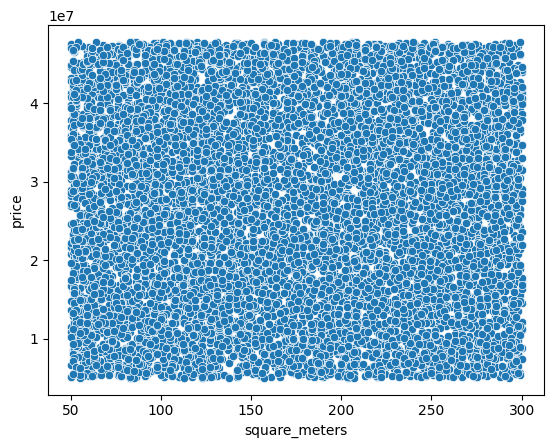

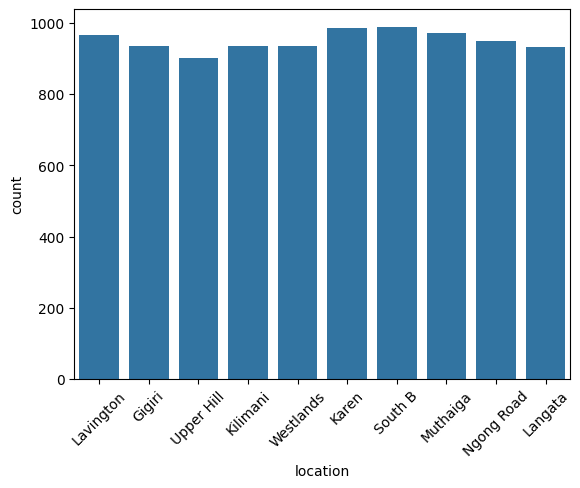

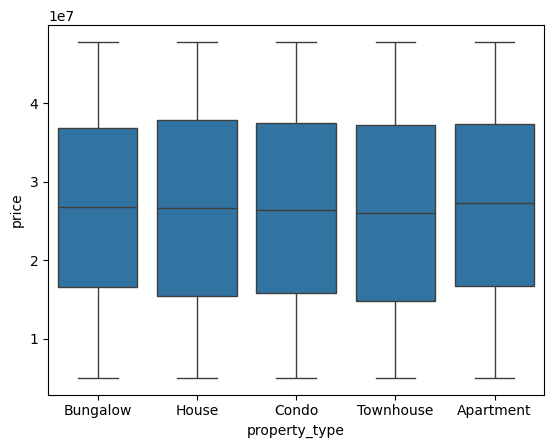

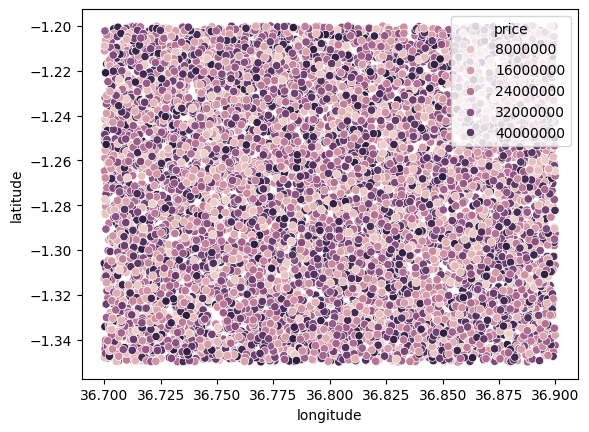

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example of visualizations
sns.histplot(df['price'])
plt.show()

sns.scatterplot(x='square_meters', y='price', data=df)
plt.show()

sns.countplot(x='location', data=df)
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='property_type', y='price', data=df)
plt.show()

sns.scatterplot(x='longitude', y='latitude', hue='price', data=df)
plt.show()

In [5]:
import os
print(os.getcwd())

/Users/ashleykemuma
